## Follow along the steps of this notebook to generate a dataset that's suitable for creating a test/train split.

**NOTE:** Many of these cells rely on earlier ones. As such, you should only execute a cell once all previous ones have finished running.

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import math
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("flights.csv", low_memory=False)
print(data.shape)
print(data)

(5819079, 31)
         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
5        2015      1    1            4      DL            806      N3730B   
6        2015      1    1            4      NK            612      N635NK   
7        2015      1    1            4      US           2013      N584UW   
8        2015      1    1            4      AA           1112      N3LAAA   
9        2015      1    1            4      DL           1173      N826DN   
10       2015      1    1            4      DL           2336      N958DN   
11       2015      1    1            4      AA           1674 

**Here, we see the data types of the features as they're encoded when imported into a DataFrame.** 

In [3]:
data.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

**NOTE:** In the report, we should discuss the creation of the DAY_OF_YEAR feature. Is it an *ordinal* or *categorical* feature? We should also discuss the decision to drop MONTH.

In [4]:
# Note: Aaron changed the entry for key = 4 from 60 to 90.
monthToDaysDict = {1: 0, 2: 31, 3: 59, 4: 90, 5: 120, 6: 151, 7: 181, 8: 212, 
                   9: 243, 10: 273, 11: 304, 12: 334}
def monthToDays(month):
    return monthToDaysDict[month]

# Remove the following features: 
# YEAR, FLIGHT_NUMBER, TAIL_NUMBER, DEPARTURE_TIME, TAXI_OUT, 
# WHEELS_OFF, ELAPSED_TIME, AIR_TIME, WHEELS_ON, TAXI_IN, and ARRIVAL_TIME
data = data.drop(['YEAR', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DEPARTURE_TIME', 
                  'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 
                  'TAXI_IN', 'ARRIVAL_TIME'], 1)

# Convert MONTH -> # of days before a month
data['MONTH'] = data['MONTH'].apply(monthToDays)

# Convert MONTH + DAYS -> DAY_OF_YEAR
data['DAY'] = data['DAY'] + data['MONTH']
data.rename(columns={'DAY': 'DAY_OF_YEAR'}, inplace=True)
data = data.drop("MONTH", 1)

In [6]:
data.dtypes

DAY_OF_YEAR              int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_DELAY        float64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [7]:
data.head()

,DAY_OF_YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,4,AS,ANC,SEA,5,-11.0,205.0,1448,430,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,AA,LAX,PBI,10,-8.0,280.0,2330,750,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,4,US,SFO,CLT,20,-2.0,286.0,2296,806,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,AA,LAX,MIA,20,-5.0,285.0,2342,805,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4,AS,SEA,ANC,25,-1.0,235.0,1448,320,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**The code below cleans the AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY features.**

In [8]:
def notANumberToZero(delay):
    if (math.isnan(delay)):
        return 0
    else:
        return delay
    
data['AIR_SYSTEM_DELAY'] = data['AIR_SYSTEM_DELAY'].apply(notANumberToZero)
data['SECURITY_DELAY'] = data['SECURITY_DELAY'].apply(notANumberToZero)
data['AIRLINE_DELAY'] = data['AIRLINE_DELAY'].apply(notANumberToZero)
data['LATE_AIRCRAFT_DELAY'] = data['LATE_AIRCRAFT_DELAY'].apply(notANumberToZero)
data['WEATHER_DELAY'] = data['WEATHER_DELAY'].apply(notANumberToZero)

print("Transforming delay columns complete!")

Transforming delay columns complete!


In [9]:
data.iloc[50000:50010]

,DAY_OF_YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
50000,4,7,DL,JAX,ATL,915,23.0,75.0,270,1030,26.0,0,0,NaN,26.0,0.0,0.0,0.0,0.0
50001,4,7,DL,MSP,SNA,915,109.0,246.0,1522,1121,83.0,0,0,NaN,0.0,0.0,83.0,0.0,0.0
50002,4,7,DL,MSP,PDX,915,0.0,242.0,1426,1117,-6.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50003,4,7,DL,ATL,SRQ,915,7.0,93.0,444,1048,8.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50004,4,7,DL,MSP,SFO,915,-4.0,265.0,1589,1140,-24.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50005,4,7,DL,DEN,ATL,915,0.0,178.0,1199,1413,-2.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50006,4,7,EV,ATL,ECP,915,10.0,68.0,240,923,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50007,4,7,EV,MOB,ATL,915,-1.0,69.0,302,1124,-3.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50008,4,7,HA,HNL,LIH,915,-4.0,38.0,102,953,3.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
50009,4,7,MQ,DFW,PIA,915,-3.0,108.0,672,1103,11.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


**The following code does 3 things to clean the data:**

1) Replace the NaN values in CANCELLATION_REASON with empty strings

2) Convert SCHEDULED_DEPARTURE to a numeric quantity ranging from 0 to 1440 representing the minutes in a day

3) Do the same for SCHEDULED_ARRIVAL

The reason we have to do the last two things is because SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL are floats which *actually* represent HHMM time values. We do not need to do the same for SCHEDULED_TIME as it represents estimated travel time in minutes.

In [10]:
def hhmmFloatToMinutes(time):
    timeString = "{:04d}".format(time)
    hours = float(timeString[0:2])
    minutes = float(timeString[2:4])
    totalMinutes = (hours * 60) + minutes
    return totalMinutes

**NOTE:** The cell below will take roughly 30 seconds to a minute to finish.

In [11]:
data['CANCELLATION_REASON'] = data['CANCELLATION_REASON'].fillna('')
data['SCHEDULED_DEPARTURE'] = data['SCHEDULED_DEPARTURE'].apply(hhmmFloatToMinutes)
data['SCHEDULED_ARRIVAL'] = data['SCHEDULED_ARRIVAL'].apply(hhmmFloatToMinutes)

missing_values will show how many NaN/None values are remaining in the dataset.

In [12]:
missing_values = data.isnull().sum(axis=0)
missing_values

DAY_OF_YEAR                 0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

**There's an issue with the ORIGIN_AIRPORT and DESTINATION_AIRPORT features for October 2015. The problem is described in [this](https://www.kaggle.com/usdot/flight-delays/discussion/29600#latest-168452) post on Kaggle. The approach to fix it is drawn from [this](https://www.kaggle.com/srcole/fix-inconsistent-airport-codes) Kaggle kernel.** 

The datasets we're using to solve the conflict between the 5-digit airport codes and the 3-letter airport codes can be found in the comments of the kernel linked above.

In [13]:
df_threeLetterCode = pd.read_csv('L_AIRPORT.csv')
df_threeLetterCode.shape

(6429, 2)

After much trial and error, I realized one issue was due to the AUS and YUM codes being replicated as BSM and NYL, respectively. We drop BSM and NYL as the flights.csv file doesn't use these codes.

In [14]:
codesToDrop = ['BSM', 'NYL']
df_threeLetterCode = df_threeLetterCode[~df_threeLetterCode['Code'].isin(codesToDrop)]
threeLetterCodes = list(df_threeLetterCode['Code'])

In [15]:
df_fiveLetterCode = pd.read_csv('L_AIRPORT_ID.csv')
df_fiveLetterCode.shape

(6414, 2)

We set different indices for these two tables to avoid creating a new dictionary.

In [16]:
df3 = df_threeLetterCode.set_index('Description')
df5 = df_fiveLetterCode.set_index('Code')

This DataFrame can be used to double-check the results of fixing the issue at hand. 

We can do so by running the apply method with testFixAirports, outputting countTest, and then comparing it to the shape of df_October.

In [17]:
df_airports = data[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
df_October = df_airports.loc[~df_airports['ORIGIN_AIRPORT'].isin(threeLetterCodes) |
                            ~df_airports['DESTINATION_AIRPORT'].isin(threeLetterCodes)]
df_October.shape

(486165, 2)

The testFixAirports function simply counts the number of 5-digit airport codes when passed to the apply method. There should be ~500k.

In [18]:
countTest = 0
nFlightsTest = 0
def testFixAirports(airport):
    global countTest
    global nFlightsTest
    nFlightsTest += 1
    if len(airport) != 3:
        countTest += 1
    if nFlightsTest % 1000000 == 0:
        print(nFlightsTest)

The fixOctoberAirports function will create a DataFrame column where the 5-digit airport codes have been replaced by 3-letter airport codes (when passed to apply).

In [19]:
nFlights = 0
def fixOctoberAirports(airport):
    global nFlights
    nFlights += 1
    
    if nFlights % 1000000 == 0:
        print(nFlights)
    
    if len(airport) != 3:
        index = int(airport)
        descriptionAsKey = df5.loc[index]['Description']
        newCode = df3.loc[descriptionAsKey]['Code']
        return newCode
    else:
        return airport

**NOTE:** The two cells below will take several minutes each to run. Specifically, after '4000000' is printed in the output, it will take several minutes to see '5000000'.

In [20]:
fixed_origin_airport = data['ORIGIN_AIRPORT'].apply(fixOctoberAirports)

1000000
2000000
3000000
4000000
5000000


In [21]:
nFlights = 0
fixed_dest_airport = data['DESTINATION_AIRPORT'].apply(fixOctoberAirports)

1000000
2000000
3000000
4000000
5000000


In [22]:
data['ORIGIN_AIRPORT'] = fixed_origin_airport
data['DESTINATION_AIRPORT'] = fixed_dest_airport

countTest should be 0 for both features now if everything worked correctly.

In [23]:
countTest = 0
nFlightsTest = 0
data['ORIGIN_AIRPORT'].apply(testFixAirports)
print()
print("countTest:", countTest)

1000000
2000000
3000000
4000000
5000000
()
('countTest:', 0)


In [24]:
countTest = 0
nFlightsTest = 0
data['DESTINATION_AIRPORT'].apply(testFixAirports)
print()
print("countTest:", countTest)

1000000
2000000
3000000
4000000
5000000
()
('countTest:', 0)


**The DataSet class allows us to create a sampled and cleaned instance of a DataFrame. There are more options for DataSet in this notebook than in the DataCleaning.ipynb notebook.**

The categorical (or nominal) variables in our dataset are: DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT, CANCELLATION_REASON, and (possibly) DAY_OF_YEAR.

In [25]:
def delayTimeToDummy(delay):
    if delay > 30:
        return 1
    else:
        return 0

# cleaningOption specifies how to handle NaN/None values.
#     * "drop" = simply drop the NaN/None values
#     * "mean" = use mean imputation to replace NaN/None values
#     * "median" = use median imputation to replace NaN/None values
#
# sampleFraction specifies how much of the dataset to sample.
#
# dropDelays controls whether to drop the AIR_SYSTEM_DELAY, SECURITY_DELAY, 
# AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY features or not.
class DataSet:
    def __init__(self, cleaningOption="drop", sampleFraction=0.1, dropDelays=True):
        # Initialize myData instance variable
        self.myData = None
        # Take care of NaN/None values
        if cleaningOption == "drop":
            self.myData = data.dropna()
        elif cleaningOption == "mean":
            self.myData = data.copy()
            self.myData['DEPARTURE_DELAY'].fillna(data['DEPARTURE_DELAY'].mean(), inplace=True)
            self.myData['SCHEDULED_TIME'].fillna(data['SCHEDULED_TIME'].mean(), inplace=True)
            self.myData['ARRIVAL_DELAY'].fillna(data['ARRIVAL_DELAY'].mean(), inplace=True)
        elif cleaningOption == "median":
            self.myData = data.copy()
            self.myData['DEPARTURE_DELAY'].fillna(data['DEPARTURE_DELAY'].median(), inplace=True)
            self.myData['SCHEDULED_TIME'].fillna(data['SCHEDULED_TIME'].median(), inplace=True)
            self.myData['ARRIVAL_DELAY'].fillna(data['ARRIVAL_DELAY'].median(), inplace=True)
        # Sample data
        self.sampleData(sampleFraction)
        # Drop delay amounts broken down by the 5 different categories
        if dropDelays:
            self.dropDelayColumns()
        # Encode DAY_OF_WEEK, AIRLINE, and CANCELLATION_REASON using one-hot encoding
        self.encodeUsingOneHot()
        # Create a binary target named ARRIVAL_DELAY_BIN: 1 if ARRIVAL_DELAY > 0; 0 otherwise
        self.createBinaryTarget()
        
        print(self.myData.shape)
    def sampleData(self, sampleFraction):
        self.myData = self.myData.sample(frac=sampleFraction, replace=False)
        # TODO: Double check whether the index should be reset
        self.myData = self.myData.reset_index()
        self.myData = self.myData.drop(['index'], axis=1)
    def encodeUsingOneHot(self):
        self.myData = pd.get_dummies(self.myData, columns=['DAY_OF_WEEK', 'AIRLINE', 'CANCELLATION_REASON'], 
                                     drop_first=True)
    def dropDelayColumns(self):
        colsToDrop = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                      'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
        self.myData.drop(colsToDrop, axis=1, inplace=True)
    def createBinaryTarget(self):
        binaryTarget = self.myData['ARRIVAL_DELAY'].apply(delayTimeToDummy)
        self.myData['ARRIVAL_DELAY_BIN'] = binaryTarget
    def encodeAirports(self):
        pass

We show the NaN/None values for the original dataset for comparison.

In [26]:
missing_values = data.isnull().sum(axis=0)
missing_values

DAY_OF_YEAR                 0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

In [27]:
ds1 = DataSet(cleaningOption="mean", sampleFraction=0.1, dropDelays=True)

(581908, 35)


In [28]:
ds1_missing_values = ds1.myData.isnull().sum(axis=0)
ds1_missing_values

DAY_OF_YEAR              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTURE_DELAY          0
SCHEDULED_TIME           0
DISTANCE                 0
SCHEDULED_ARRIVAL        0
ARRIVAL_DELAY            0
DIVERTED                 0
CANCELLED                0
DAY_OF_WEEK_2            0
DAY_OF_WEEK_3            0
DAY_OF_WEEK_4            0
DAY_OF_WEEK_5            0
DAY_OF_WEEK_6            0
DAY_OF_WEEK_7            0
AIRLINE_AS               0
AIRLINE_B6               0
AIRLINE_DL               0
AIRLINE_EV               0
AIRLINE_F9               0
AIRLINE_HA               0
AIRLINE_MQ               0
AIRLINE_NK               0
AIRLINE_OO               0
AIRLINE_UA               0
AIRLINE_US               0
AIRLINE_VX               0
AIRLINE_WN               0
CANCELLATION_REASON_A    0
CANCELLATION_REASON_B    0
CANCELLATION_REASON_C    0
CANCELLATION_REASON_D    0
ARRIVAL_DELAY_BIN        0
dtype: int64

**TODO:** ORIGIN_AIRPORT, DESTINATION_AIRPORT, and DAY_OF_YEAR still need to be encoded to be used in a model. 

To accomplish the task above, we can use the weight of evidence (WOE) measure described [here](https://www.kdnuggets.com/2016/08/include-high-cardinality-attributes-predictive-model.html) and [here](https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/). It is well-suited to high-cardinality categorical variables (i.e. those with many options). To assist with this task, I created the ARRIVAL_DELAY_BIN target variable.

A simpler option is to drop ORIGIN_AIRPORT/DESTINATION_AIRPORT, and simply use DAY_OF_YEAR as is. It is uncertain how much error doing so will introduce.

**TODO:** Depending on the model, certain features will need to be scaled. 

Here are some resources to help us decide how/why to do so:

* https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm)

* https://stats.stackexchange.com/questions/539/does-it-ever-make-sense-to-treat-categorical-data-as-continuous

In [30]:
ds1.myData.to_csv('cleaned_and_sampled_flights_v2.csv', index=False)

In [31]:
data = pd.read_csv("cleaned_and_sampled_flights_v2.csv", low_memory=False)

Set delay time and show baseline

In [32]:
def delayTimeToDummy(delay):
    if delay > 0:
        return 1
    else: 
        return 0

binaryTarget = data['ARRIVAL_DELAY'].apply(delayTimeToDummy)
data['ARRIVAL_DELAY_BIN'] = binaryTarget
print('Baseline {}'.format(1-data.ARRIVAL_DELAY_BIN[data.ARRIVAL_DELAY_BIN==1].shape[0]/(np.float(data.shape[0]))))

Baseline 0.622454064904


#### WOE
Calculating WOE as log((pi / p) / (ni / n)    
where 
* pi = delayed flights in the category (eg number of delayed fligts per ORIGIN_AIRPORT)
* ni = on time flights in the category (eg number of on time fligts per ORIGIN_AIRPORT)
* p = total number of delayed 
* n = total number of on time

In [43]:
def get_woe(column, dataframe):
    column_to_woe = dataframe[column].copy()
    total_count = dataframe[column].value_counts()
    tot_loop = total_count.shape[0]
    p = np.float(dataframe[(data.ARRIVAL_DELAY_BIN) == 1].shape[0])
    n = dataframe.shape[0]-p
    i=0
    for item in total_count.iteritems():
        i+=1
        #print '{0} of {1}\r'.format(i, tot_loop),
        pi = dataframe[(dataframe[column] == item[0]) & (dataframe.ARRIVAL_DELAY_BIN)].shape[0]
        ni = np.float(item[1]-pi)
        if pi==0 or ni==0:
            WOE = float('nan')
        else:
            WOE = np.log((pi/p)/(ni/n))
            
        column_to_woe[column_to_woe == item[0]] = WOE
    return column_to_woe.apply(pd.to_numeric)
    

Adding WOE for ORIGIN_AIRPORT

In [6]:
print(data.columns.values)

['DAY_OF_YEAR' 'ORIGIN_AIRPORT' 'DESTINATION_AIRPORT' 'SCHEDULED_DEPARTURE'
 'DEPARTURE_DELAY' 'SCHEDULED_TIME' 'DISTANCE' 'SCHEDULED_ARRIVAL'
 'ARRIVAL_DELAY' 'DIVERTED' 'CANCELLED' 'DAY_OF_WEEK_2' 'DAY_OF_WEEK_3'
 'DAY_OF_WEEK_4' 'DAY_OF_WEEK_5' 'DAY_OF_WEEK_6' 'DAY_OF_WEEK_7'
 'AIRLINE_AS' 'AIRLINE_B6' 'AIRLINE_DL' 'AIRLINE_EV' 'AIRLINE_F9'
 'AIRLINE_HA' 'AIRLINE_MQ' 'AIRLINE_NK' 'AIRLINE_OO' 'AIRLINE_UA'
 'AIRLINE_US' 'AIRLINE_VX' 'AIRLINE_WN' 'CANCELLATION_REASON_A'
 'CANCELLATION_REASON_B' 'CANCELLATION_REASON_C' 'CANCELLATION_REASON_D'
 'ARRIVAL_DELAY_BIN']


In [7]:
origin_woe = get_woe('ORIGIN_AIRPORT', data)
data['ORIGIN_WOE'] = origin_woe

Adding WOE for DESTINATION_AIRPORT

In [8]:
destination_woe = get_woe('DESTINATION_AIRPORT', data)
data['DESTINATION_WOE'] = destination_woe

Adding WOE for DAY_OF_YEAR

In [9]:
day_of_year_woe = get_woe('DAY_OF_YEAR', data)
data['DAY_OF_YEAR_WOE'] = day_of_year_woe

Removing rows of None values

In [ ]:
data.to_csv('cleaned_and_sampled_flights_v2_WOE.csv')

In [11]:
data=pd.read_csv('cleaned_and_sampled_flights_v2_WOE.csv')
print(data.shape)
data = data.dropna(axis=0, how='any')
print(data.shape)

(581908, 39)
(581895, 39)


In [9]:
# Used this to save data and plot to test parameters
def save_plot_and_data(cv_results, params):
    res = pd.DataFrame(cv_results)
    res.to_csv('csv_result/XGB_{}_{}'.format(params.keys()[0],0))
    estimators = [x.get(params.keys()[0]) for x in res.params]
    plt.plot(estimators, res.mean_test_score)
    plt.xlabel('n')
    plt.ylabel('Accuracy')
    plt.title('XGB {}'.format(params.keys()[0]))
    plt.savefig('csv_result/XGB_{}_{}.png'.format(params.keys()[0],0))
    plt.show()
    

Creating splits, training and testing data. I removed the WOE columns from the dataset as well just to compare.

In [10]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.externals import joblib

headers = data.columns.values
print(headers)
X = data.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT','CANCELLATION_REASON_A','DEPARTURE_DELAY', \
             'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C','ARRIVAL_DELAY_BIN','ARRIVAL_DELAY',\
             'DIVERTED','CANCELLED'], axis=1)
y = data['ARRIVAL_DELAY_BIN']
X2 = X.drop(['DESTINATION_WOE', 'ORIGIN_WOE', 'DAY_OF_YEAR_WOE'], axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)
X2_train = X_train.drop(['DESTINATION_WOE', 'ORIGIN_WOE', 'DAY_OF_YEAR_WOE'], axis=1)
X2_test = X_test.drop(['DESTINATION_WOE', 'ORIGIN_WOE', 'DAY_OF_YEAR_WOE'], axis=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

['Unnamed: 0' 'DAY_OF_YEAR' 'ORIGIN_AIRPORT' 'DESTINATION_AIRPORT'
 'SCHEDULED_DEPARTURE' 'DEPARTURE_DELAY' 'SCHEDULED_TIME' 'DISTANCE'
 'SCHEDULED_ARRIVAL' 'ARRIVAL_DELAY' 'DIVERTED' 'CANCELLED' 'DAY_OF_WEEK_2'
 'DAY_OF_WEEK_3' 'DAY_OF_WEEK_4' 'DAY_OF_WEEK_5' 'DAY_OF_WEEK_6'
 'DAY_OF_WEEK_7' 'AIRLINE_AS' 'AIRLINE_B6' 'AIRLINE_DL' 'AIRLINE_EV'
 'AIRLINE_F9' 'AIRLINE_HA' 'AIRLINE_MQ' 'AIRLINE_NK' 'AIRLINE_OO'
 'AIRLINE_UA' 'AIRLINE_US' 'AIRLINE_VX' 'AIRLINE_WN'
 'CANCELLATION_REASON_A' 'CANCELLATION_REASON_B' 'CANCELLATION_REASON_C'
 'CANCELLATION_REASON_D' 'ARRIVAL_DELAY_BIN' 'ORIGIN_WOE' 'DESTINATION_WOE'
 'DAY_OF_YEAR_WOE']
(389869, 29) (192026, 29) (389869,) (192026,)


Setting parameters for gridsearch

In [13]:
paramRF = {'max_depth':np.arange(1,50,5)}
paramSVM = {'kernel':['rbf','linear','poly']}
paramXGB = {'gamma':np.arange(0,0.5,0.1)}

Creating classifiers

In [18]:
RF_classifier = GridSearchCV(RandomForestClassifier(), param_grid=paramRF, \
                             cv=2,scoring='accuracy', verbose=1)

SVM_classifier = GridSearchCV(svm.SVC(), param_grid=paramSVM, \
                              cv=2,scoring='accuracy', verbose=1)

XGB_classifier = GridSearchCV(XGBClassifier(), param_grid=paramXGB, \
                            cv=2, scoring='accuracy',verbose=1)

### Only testing SVM

In [14]:
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#joblib.dump(svm, 'svm.pkl') 

In [14]:
svm = joblib.load('svm.pkl') 

In [15]:
y_pred = svm.predict(X_test)
accuracy_score(y_pred, y_test)

0.62201993480049578

In [138]:
#RF_classifier.fit(X_train, y_train)
RF_classifier.fit(X2_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [1]:
#y_pred = RF_classifier.predict(X_test)
y_pred = RF_classifier.predict(X2_test)

NameError: name 'RF_classifier' is not defined

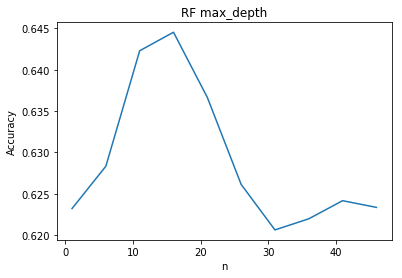

,Unnamed: 0,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0,0.667393,0.160636,0.623218,0.623218,1,{'max_depth': 1},8,0.623217,0.623220,0.623220,0.623217,0.025390,0.003417,0.000002,0.000002
1,1,1.333563,0.215765,0.628338,0.629500,6,{'max_depth': 6},4,0.626459,0.627606,0.630217,0.631394,0.063499,0.009598,0.001879,0.001894
2,2,2.776154,0.322209,0.642301,0.659592,11,{'max_depth': 11},2,0.641330,0.659237,0.643273,0.659947,0.316454,0.023506,0.000971,0.000355
3,3,3.386448,0.498984,0.644541,0.725770,16,{'max_depth': 16},1,0.644849,0.724853,0.644232,0.726686,0.232971,0.005269,0.000309,0.000916
4,4,4.026210,0.677570,0.636661,0.836778,21,{'max_depth': 21},3,0.635836,0.838686,0.637486,0.834870,0.043982,0.010864,0.000825,0.001908
5,5,4.248495,0.789066,0.626140,0.925714,26,{'max_depth': 26},5,0.625315,0.929115,0.626965,0.922313,0.269888,0.010024,0.000825,0.003401
6,6,4.176677,0.858800,0.620633,0.964242,31,{'max_depth': 31},10,0.619800,0.963875,0.621466,0.964609,0.035837,0.027900,0.000833,0.000367
7,7,4.448845,0.903845,0.621977,0.975041,36,{'max_depth': 36},9,0.623422,0.975736,0.620532,0.974346,0.193139,0.007484,0.001445,0.000695
8,8,4.429007,1.024269,0.624167,0.976646,41,{'max_depth': 41},6,0.624366,0.976762,0.623969,0.976531,0.119229,0.062204,0.000198,0.000115
9,9,5.166384,1.071683,0.623359,0.976233,46,{'max_depth': 46},7,0.622909,0.976372,0.623810,0.976095,0.215549,0.046982,0.000450,0.000138


In [143]:
accuracy_score(y_test, y_pred)
save_plot_and_data(RF_classifier.cv_results_, paramRF)
res=pd.read_csv('csv_result/RF_max_depth_0')
res

Don't start this one unless you have a lot of time. I have no idea how long it will take.

In [ ]:
SVM_classifier.fit(X_train, y_train)
#SVM_classifier.fit(X2_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


In [433]:
y_pred = SVM_classifier.predict(X_test)
#y_pred = SVM_classifier.predict(X2_test)
#accuracy_score(y_test, y_pred)

0.64419151498719995

In [19]:
#XGB_classifier.fit(X_train, y_train)
XGB_classifier.fit(X2_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([ 0. ,  0.1,  0.2,  0.3,  0.4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

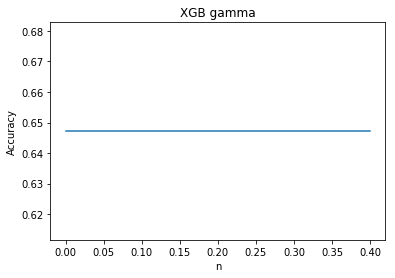

In [20]:
#y_pred = XGB_classifier.predict(X_test)
y_pred = XGB_classifier.predict(X2_test)
save_plot_and_data(XGB_classifier.cv_results_, paramXGB)
res=pd.read_csv('csv_result/XGB_min_child_weight_0')
